In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import snap
import networkx

In [3]:
labels=pd.read_csv('../input/stage1_combined_train_variant.csv',index_col=0)['Class'].to_dict()
len(labels)

3689

In [4]:
df =pd.read_csv('stage2_edges_30.txt',header=None)

In [5]:
df.columns=['rawsrc','rawdest','w']
df.shape

(57293, 3)

In [6]:
df.head()

rawsrc rawdest     w
0  tr12913  tr2416  1831
1   tr1038  tr1051  3105
2   tr2426  tr2574  3954
3    te644   te797  2548
4   tr2851  tr2895  1913

In [7]:
df['src']=df['rawsrc'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 100000+int(u[2:]))
df['dest']=df['rawdest'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 100000+int(u[2:]))

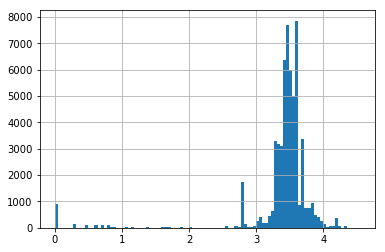

In [8]:
np.log10(df['w']).hist(bins=100);

In [9]:
10**3

1000

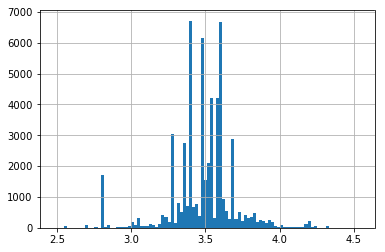

In [10]:
np.log10(df[df['w']>300]['w']).hist(bins=100);

In [11]:
np.log10 (28684) 

4.4576397138296802

In [12]:
10**4 

10000

In [13]:
10**2.5

316.22776601683796

In [14]:
subdf=df[(df['w']>300*1) & (df['w']<10000)][['src','dest','w']]
subdf.shape

(54704, 3)

In [15]:
nodes=set(pd.concat([subdf['src'],subdf['dest']]))
len(nodes),len([u for u in nodes if u <100000]),len([u for u in nodes if u >=100000])

(3807, 648, 3159)

In [16]:
g=snap.PUNGraph.New()

In [17]:
use_test=True
for n in nodes:
    if use_test or n>=100000:
        g.AddNode(n)

In [18]:
for row in subdf.values:
    u,v,w=row[:3]
    if use_test or u>100000 and v >100000:
        g.AddEdge(u,v)

In [19]:
np.log(0.2),np.log(0.417323),np.log(0.617323)

(-1.6094379124341003, -0.87389477668013282, -0.48236289124512222)

In [20]:
np.log(0.090909)*0.090909*9

-1.9619131703748525

In [21]:
Components = snap.TCnComV()
#snap.GetWccs(g, Components)
snap.CommunityCNM(g,Components)
#snap.CommunityGirvanNewman(g,Components)

lst=[]
lst2=[]
for CnCom in Components:
    trainlabels=[nid for nid in CnCom if nid>=100000]
    testlabels=[nid for nid in CnCom if nid<100000]
    
    n1=len([_ for nid in CnCom if nid>=100000])
    cl=[labels[i-100000] for i in  CnCom if i>=100000]
    vc=pd.Series(cl).value_counts()
    vcc=vc.loc[range(1,10)].fillna(0)+1
    p= (vcc/vcc.sum()).tolist()
    lst2+=[[u]+p for u in CnCom]
    if vc.sum()>0: lst.append([CnCom.Len(), n1 ]+ p)
#pd.DataFrame(lst).sort_values(2)

In [22]:
gg=lambda x: -x*np.log(x)-(1-x)*np.log(1./8-x/8)
#x=np.arange(0.5,0.99,0.01)
#plt.plot(x,-x*np.log(x)-(1-x)*np.log(1./8-x/8))

In [23]:
def f(u):
    a=u[2:11]
    b=u[1]
    c=[v*np.log(v) for v in a]
    return np.sum(c)*b
pd.DataFrame(lst).apply(lambda u:f(u),axis=1).sum()/float(len([u for u in nodes if u >=100000]))

-1.5652523447773152

In [24]:
a=pd.DataFrame(lst)
a['maxp']=np.max(a.values[:,2:11],1)
a['loss']=-a.apply(f,1)/a.loc[:,1]
a['aa']=np.round(a['maxp'].map(gg)-a['loss'],5)
a.sort_values('loss').head(50)


0    1         2         3         4         5         6         7  \
1    139  124  0.015038  0.007519  0.045113  0.872180  0.007519  0.007519   
92    30   29  0.026316  0.026316  0.026316  0.026316  0.026316  0.789474   
24    58   51  0.050000  0.033333  0.016667  0.766667  0.016667  0.033333   
23   132  123  0.098485  0.007576  0.007576  0.022727  0.151515  0.689394   
54    27   23  0.031250  0.031250  0.031250  0.031250  0.031250  0.031250   
6    175  150  0.025157  0.364780  0.056604  0.012579  0.031447  0.006289   
68    20   17  0.038462  0.038462  0.038462  0.038462  0.038462  0.692308   
64   105   93  0.029412  0.254902  0.009804  0.009804  0.039216  0.068627   
27    49   44  0.433962  0.018868  0.018868  0.415094  0.018868  0.018868   
8     96   80  0.011236  0.134831  0.123596  0.011236  0.067416  0.022472   
38    37   31  0.025000  0.400000  0.025000  0.025000  0.025000  0.025000   
10    24   20  0.034483  0.137931  0.034483  0.034483  0.034483  0.034483   
46    28   22  0.193548  0.032258  0.032258  0.580645  0.032258  0.032258   
11   153  120  0.379845  0.015504  0.023256  0.302326  0.015504  0.023256   
43    44   38  0.021277  0.085106  0.297872  0.021277  0.042553  0.021277   
73    31   26  0.285714  0.028571  0.028571  0.485714  0.028571  0.057143   
2    122   97  0.009434  0.169811  0.018868  0.028302  0.047170  0.047170   
32    78   60  0.362319  0.014493  0.028986  0.376812  0.072464  0.101449   
21    32   26  0.028571  0.142857  0.085714  0.028571  0.085714  0.028571   
18   288  254  0.254753  0.003802  0.060837  0.182510  0.380228  0.098859   
9    376  261  0.159259  0.262963  0.003704  0.096296  0.037037  0.018519   
69    19   15  0.041667  0.083333  0.125000  0.041667  0.041667  0.041667   
84    11    9  0.555556  0.055556  0.055556  0.055556  0.055556  0.055556   
198    9    9  0.055556  0.055556  0.055556  0.555556  0.055556  0.055556   
87    13   12  0.523810  0.047619  0.047619  0.047619  0.142857  0.047619   
134   13   12  0.523810  0.047619  0.047619  0.142857  0.047619  0.047619   
34   109   93  0.225490  0.029412  0.029412  0.352941  0.205882  0.127451   
81    16   14  0.521739  0.043478  0.043478  0.043478  0.043478  0.130435   
78    14   12  0.095238  0.047619  0.047619  0.523810  0.047619  0.095238   
25    28   23  0.031250  0.093750  0.062500  0.500000  0.125000  0.093750   
3    241  196  0.053659  0.180488  0.029268  0.156098  0.043902  0.019512   
28    36   26  0.085714  0.257143  0.028571  0.114286  0.028571  0.028571   
149   24   24  0.060606  0.181818  0.030303  0.030303  0.030303  0.454545   
52    24   21  0.100000  0.066667  0.033333  0.033333  0.400000  0.033333   
107   14   11  0.050000  0.050000  0.050000  0.100000  0.100000  0.050000   
29    11    9  0.500000  0.111111  0.055556  0.055556  0.055556  0.055556   
15   213  179  0.132979  0.207447  0.015957  0.132979  0.058511  0.042553   
228    7    7  0.062500  0.062500  0.062500  0.062500  0.062500  0.062500   
45     8    7  0.062500  0.062500  0.062500  0.062500  0.062500  0.062500   
109   13   12  0.047619  0.047619  0.380952  0.047619  0.047619  0.047619   
129   13   12  0.047619  0.047619  0.333333  0.333333  0.047619  0.047619   
42    14   12  0.333333  0.047619  0.047619  0.333333  0.047619  0.047619   
63    10    8  0.470588  0.058824  0.058824  0.117647  0.058824  0.058824   
245    8    8  0.058824  0.117647  0.058824  0.058824  0.058824  0.058824   
5     32   29  0.026316  0.131579  0.026316  0.131579  0.078947  0.026316   
74    15   13  0.363636  0.045455  0.045455  0.045455  0.090909  0.272727   
57    18   16  0.320000  0.040000  0.040000  0.040000  0.160000  0.280000   
163    6    6  0.066667  0.466667  0.066667  0.066667  0.066667  0.066667   
70     8    6  0.066667  0.066667  0.066667  0.466667  0.066667  0.066667   
14     7    6  0.066667  0.066667  0.066667  0.066667  0.066667  0.066667   

            8         9        10      maxp      loss       aa  
1    0.030075 

In [25]:
df=pd.DataFrame(lst2,columns=['ID']+["w30_"+str(i) for i in range(1,10)])
df.index=df['ID']
df=df.drop("ID",1)

In [26]:
newtrain=df[df.index>=100000].sort_index()
newtrain.index=newtrain.index-100000
newtest=df[df.index<100000].sort_index()

In [27]:
newtrain.to_csv("../input/stage2_newtrain_w30p.csv")
newtest.to_csv("../input/stage2_newtest_w30p.csv")

In [28]:
snap.CntUniqUndirEdges(g)

54704

In [29]:
snap.CntDegNodes(g,22)

16

In [30]:
def cmty_kcore(K):
    kcore=snap.GetKCore(g,K)
    CmtyV = snap.TCnComV()
    modularity = snap.CommunityCNM(kcore, CmtyV)
    lst=[]
    for CnCom in CmtyV:
        n1=len([_ for nid in CnCom if nid>=10000])
        cl=[labels[i-10000] for i in  CnCom if i>=10000]
        vc=pd.Series(cl).value_counts()
        vcc=vc.loc[range(1,10)].fillna(0)+1
        p= (vcc/vcc.sum()).tolist()
        if vc.sum()>0: lst.append([CnCom.Len(), n1 ]+ p)
    df=pd.DataFrame(lst) 
    print df.shape,modularity  
    #print df
    df['maxp']=np.max(df.values[:,2:11],1)
    df['loss']=-df.apply(f,1)/df.loc[:,1]
    df['aa']=np.round(df['maxp'].map(gg)-df['loss'],5)    
    print df.shape,modularity,df.sum()[1]
    #plt.scatter(df.loc[:,1],df.loc[:,2]);plt.show()
    return df.sort_values('loss')

In [31]:
np.log(0.652174)*0.652174

-0.27876778596921697

In [32]:
cmty_kcore(20)

(18, 11) 0.805088781639
(18, 14) 0.805088781639 1106.0


0    1         2         3         4         5         6         7  \
5   118  107  0.008621  0.008621  0.051724  0.887931  0.008621  0.008621   
14   40   35  0.045455  0.022727  0.022727  0.795455  0.022727  0.022727   
3    88   77  0.011628  0.267442  0.011628  0.011628  0.011628  0.011628   
4   117  109  0.110169  0.008475  0.008475  0.025424  0.161017  0.661017   
9    30   25  0.029412  0.058824  0.029412  0.029412  0.029412  0.029412   
1    71   62  0.014085  0.056338  0.154930  0.014085  0.084507  0.014085   
11   44   39  0.020833  0.354167  0.020833  0.020833  0.020833  0.020833   
6    43   38  0.468085  0.021277  0.021277  0.361702  0.021277  0.021277   
16   52   50  0.016949  0.016949  0.135593  0.152542  0.050847  0.576271   
13   30   26  0.028571  0.314286  0.028571  0.028571  0.028571  0.028571   
10   41   36  0.022222  0.088889  0.288889  0.022222  0.022222  0.022222   
7   240  216  0.266667  0.004444  0.040000  0.177778  0.400000  0.097778   
17   56   47  0.017857  0.214286  0.035714  0.035714  0.071429  0.071429   
0    26   23  0.031250  0.031250  0.156250  0.031250  0.125000  0.031250   
2   204  122  0.396947  0.167939  0.022901  0.183206  0.015267  0.053435   
12   24   21  0.100000  0.066667  0.033333  0.033333  0.400000  0.033333   
8    61   55  0.234375  0.015625  0.031250  0.250000  0.265625  0.156250   
15   21   18  0.333333  0.037037  0.037037  0.111111  0.148148  0.222222   

           8         9        10      maxp      loss       aa  
5   0.008621  0.008621  0.008621  0.887931  0.545593  0.03827  
14  0.022727  0.022727  0.022727  0.795455  0.924565  0.00741  
3   0.651163  0.011628  0.011628  0.651163  0.994626  0.37748  
4   0.008475  0.008475  0.008475  0.661017  1.106212  0.23904  
9   0.735294  0.029412  0.029412  0.735294  1.118767  0.00960  
1   0.633803  0.014085  0.014085  0.633803  1.248984  0.16940  
11  0.479167  0.041667  0.020833  0.479167  1.336466  0.43886  
6   0.042553  0.021277  0.021277  0.468085  1.349002  0.44819  
16  0.016949  0.016949  0.016949  0.576271  1.372408  0.19018  
13  0.485714  0.028571  0.028571  0.485714  1.425592  0.33657  
10  0.488889  0.022222  0.022222  0.488889  1.431275  0.32445  
7   0.004444  0.004444  0.004444  0.400000  1.478426  0.44225  
17  0.517857  0.017857  0.017857  0.517857  1.501541  0.19356  
0   0.531250  0.031250  0.031250  0.531250  1.535830  0.13010  
2   0.122137  0.030534  0.007634  0.396947  1.684732  0.24104  
12  0.266667  0.033333  0.033333  0.400000  1.696646  0.22403  
8   0.015625  0.015625  0.015625  0.265625  1.697025  0.40892  
15  0.037037  0.037037  0.037037  0.333333  1.837815  0.18499